<a href="https://colab.research.google.com/github/Tole01/Fundamentos_redes_neuronales/blob/main/Fundamentos_de_redes_neuronales_con_python_y_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras import layers, models, optimizers
from keras.utils import to_categorical
from keras.datasets import mnist, imdb, reuters, boston_housing

from sklearn.datasets import make_gaussian_quantiles

# Estructuras con distintas dimensiones 

In [ ]:
# Escalar
x = np.array(42)
print(x.shape)
x.ndim

()


0

In [ ]:
# Vector
x = np.array([42,23,453,21,32,1,3,7])
print(x.shape)
x.ndim

(8,)


1

In [ ]:
# Matriz
x = np.array([[42,23,453],
             [34,343,24]])
print(x.shape)
x.ndim

(2, 3)


2

In [ ]:
# Tensor
x = np.array([[[42,23,453],
             [34,343,24]],
             [[42,23,453],
             [34,343,24]],
             [[42,23,453],
             [34,343,24]],
             [[42,23,453],
             [34,343,24]]])

# Imprime 4 estructuras de 2 filas y 3 columnas
print(x.shape)
x.ndim

(4, 2, 3)


3

## Reshape

Es una funcion util de numpy para rearreglar los arreglos de as estructuras.

In [ ]:
x = np.array([[0,1],
             [2,3],
             [4,5],
             [6,7]])
x.shape

(4, 2)

In [ ]:
x.reshape(8,1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [ ]:
x.reshape(4,2,1)

array([[[0],
        [1]],

       [[2],
        [3]],

       [[4],
        [5]],

       [[6],
        [7]]])

In [ ]:
x.reshape(4,2,1).T

array([[[0, 2, 4, 6],
        [1, 3, 5, 7]]])

# Explicacion

## Perceptron

La neurona, también llamado perceptrón (nacido en los años 50’s) está inspirado en las redes neuronales biológicas.

El funcionamiento del perceptrón se describe de la siguiente manera:

1. Se realiza una suma ponderada de las entradas con los pesos (weights w). Esto da como resultado una salida lineal.

2. Esta salida se pasa por una función de activación que introduce no linealidades al perceptrón.

3. Si el modelo no satisface de forma adecuada el problema entonces se itera. Se itera actualizando los pesos hasta resolver el problema.

El caso de querer cumplir 1 condicion unica, el modelo hace uso de 2 o mas neuronas para lograr separar los datos correctos, ya que generas un area en donde se encuentran los numeros que cumplen esa condicion.

## Arquitectura Deep Learning

Las redes neuronales no son mas que la union de muchisimos perceptrones a traves de una estructura base, la cual se divide en tres partes:

* Capa de entrada: en donde los datos son introducidos.
* Capas ocultas: se encuentran entre la capa de salida y la capa de entrada. Las capas ocultas son quienes hacen las operaciones matemáticas para obtener la prediccion. Van desde lo mas general hasta lo mas fino.
* Capa de salida: esta realiza la predicción o categorizacion de los datos.

Dentro de la arquitectura de la red neuronal ocurren muchas operaciones de producto punto entre las entradas de cada perceptron con sus respectivos pesos. Estas operaciones son lineales. 

El problema de las operaciones lineales es que en la capa de salida solo de podria generar 1 solo escalar, ya que todas las operaciones son lineales.

Es por esto que se crearon las funciones de activación, que son la solución al colapso de las linealidades de las capas de la red neuronal.



# Funciones de Activacion

1. `Función escalón O THRESHOLD`: Esta función produce una salida binaria (1 o 0) en función de si la entrada total es mayor o menor que un valor umbral. Esta función es útil para `problemas de `clasificación binaria simples.

$$ f(x) = \begin{cases} 0, & \text{si } x < 0 \\ 1, & \text{si } x \geq 0\end{cases} $$
  
2. `Función signo`: Esta función produce una etiqueta a cada valor de entrada. Esta etiqueta puede ser -1, 0 o 1, dependiendo del valor de entrada. Esta función es útil para `problemas de clasificación binaria` simples.

$$ f(x) = \begin{cases} -1, & x < 0 \\ 1, & x \geq 0 \end{cases} $$
        
3. `Función sigmoide`: Esta función produce una salida en el rango de 0 a 1 y tiene una forma de curva en forma de "S". Esta función es útil para `problemas de clasificación y regresión`.

$$ f(x) = \frac{1}{1+e^{-x}} $$
    
        
4. `Función tangente hiperbólica (tanh)`: Esta función produce una salida en el rango de -1 a 1 y tiene una forma de curva en forma de "S". Esta función es similar a la función sigmoidea y también es útil para `problemas de clasificación y regresión`.
        
$$ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$
        
5. `Unidad lineal rectificada (ReLU)`: Esta función produce una salida lineal para valores positivos de entrada y una salida cero para valores negativos de entrada. Esta función es útil para `problemas de clasificación y regresión` y es particularmente `efectiva en redes neuronales profundas`.
        
$$ f(x) = \begin{cases} 0, & x < 0 \ \\ x, & x \geq 0 \end{cases}$$
        
6. `Softmax`: Esta función se utiliza en la capa de salida de una red neuronal para producir una distribución de probabilidad sobre las clases de salida. La salida de la función softmax es una probabilidad para cada clase, y la suma de todas las probabilidades es igual a 1. Esta función es útil para `problemas de clasificación con múltiples clases`.

$$ f(x) = \frac{e^{x_{j}}} {∑^{K}_{k = 1} e^{x_{k}}} $$

En el caso de la derivada, h funciona bien con 12 decimales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# DERIVACION DE FUNCIONES
def df(f, x):
    h = 0.000000000001 
    return (f(x+h)-f(x))/h 


# Funcion ESCALON y su derivada
def step(x):
    return np.piecewise(x, [x < 0.0, x > 0.0], [0,1])

# Funcion SIGNO y su derivada
def sign(x):
  return np.sign(x)

# Funcion SIGMOIDE y su derivada
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


# Funcion TANGENTE HIPERBOLICA y su derivada
def tanh(x):
  return np.tanh(x)
        

# Funcion RELU y su derivada
def relu(x):
  return np.maximum(0, x)

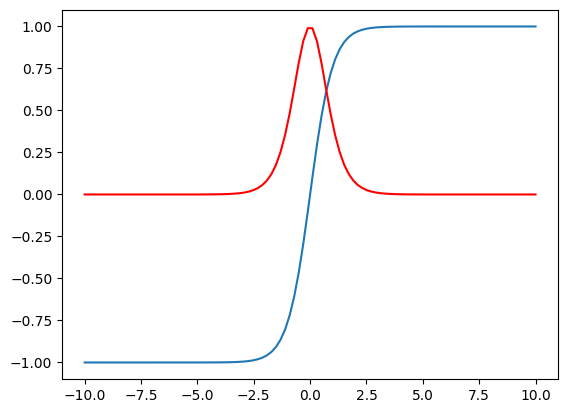

In [ ]:
# Valores de x
x = np.linspace(10,-10,100)

# Grafica con la funcion y su derivada
plt.plot(x, tanh(x))
plt.plot(x, df(tanh, x), 'r')

# Funcion de Perdida o de Coste

La función de pérdida evalúa los valores reales contra la predicción. Por lo tanto, un valor alto en la función de pérdida indica que nuestras predicciones son malas. En cambio, un valor bajo de la función de pérdida indica una buena predicción.

Para el caso de una regresión, tenemos la `función de pérdida del error cuadrático medio (MSE)`:

$MSE = \frac{1}{n} ∑ (y_{predicho}  - y_{real})^{2}$

Para el caso de clasificaciones tenemos la `función de Cross Entropy`:

$- ∑_{x} p(x) log q(x)$

Esta funcion mide la distancia entre la prediccion de nuestro algoritmo y nuestro valor real. El score arrojado nos permite saber si los pesos de nuestras neuronas estan bien ajustados.

In [ ]:
def mse(y, y_hat, derivate = False):
  n = len(y)
  if derivate:
    return 2 * np.mean(y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

In [ ]:
# Ejemplo de arreglos
real = np.array([0,0,1,1])
prediccion = np.array([0.9,0.5,0.2,0])

# Ejemplo de MSE y su derivada
print(mse(real, prediccion))
print(mse(real, prediccion, derivate = True))

0.675
-0.20000000000000007


# Descenso del Gradiente

## Ejemplo

Una analogia para explicar el descenso del gradiente es el momentum. Imaginemos que el gradiente es una pelota que trata de encontrar el hueco mas profundo en una zona y la zona tiene dos huecos. El primer hueco tiene poca profundidad y el segundo, o el que le sigue, tiene muchisima profundidad.

Entonces, si aplicamos el momentum es adecuado a la pelota, entonces la pelota mantendra la suficiente energia para salir del 1er hueco y entrar en un hueco mas profundo. Si el momentum es muy bajo, la pelota no saldra del 1er. Por el otro lado, si el momentum es excesivo, puede que la pelota no se quede en ningun hueco.

## Introduccion

El descenso del gradiente es una de las tecnicas de optimizacion numerica. Estas tecnicas de optimizacion se dividen en 3:

* Nelder-Mead
* Descenso del gradiente
* Gradiente conjugado

y lo que permiten, es encontrar los minimos locales o el minimo global de una funcion, tal y como se puede observar en el siguiente URL:
[Optimizacion Numerica](http://www.benfrederickson.com/numerical-optimization/)

## Descenso del gradiente 

Para obtener la mejor prediccion posible, debemos de minimizar la funcion de perdida a traves de los minimos locales o del minimo absoluto de la funcion.

Estos minimos locales pueden ser hallados a traves del *learning rate* o $α$, el cual es el coeficiente que indica que tan rapido o lento aprende el modelo de redes neuronales. 

Si este coeficiente $α$ es muy grande, entonces el modelo aprendera muy rapido pero con mucho error, ya que $α$ no podra encontrar el minimo local o absoluto de la funcion.

Por otro lado, si el coeficiente $α$ es muy bajo, entonces el modelo aprendera muy lento y eventualmente llegara al minimo local o absoluto de la funcion. Esto sera muy tardado, pero sin errores.

Lo mejor que se puede hacer es tener una velocidad media en $α$, que nos permita aprender lo mas rapido posible y converger en el minimo absoluto sin errores. 

## Argumento

Para programar la tecnica de optimizacion numerica que queremos utilizar en la red neuronal, usamos el argumento `optimizer` del metodo `model.compile()`. 

El `rmsprop` es una tecnica de descenso de gradiente que utiliza momentum para resolver el modelo. Usa las derivadas parciales negativas para encontrar el cambio en la pendiente que te lleva hacia los minimos.



# Backpropagation

## Explicacion

Backpropagation (propagación hacia atrás) es un algoritmo de entrenamiento utilizado en redes neuronales artificiales para ajustar los pesos de las conexiones entre las neuronas. Es una técnica de optimización que utiliza el descenso del gradiente para minimizar la función de error entre las salidas de la red y los valores objetivo.

La propagación hacia atrás se llama así porque el error se propaga a través de la red desde la capa de salida hasta la capa de entrada, de manera inversa al flujo de la información durante la fase de entrenamiento hacia adelante (feedforward). Durante el proceso de entrenamiento, se calcula el error de la salida de la red en función de los valores objetivo, y luego se propagan estos errores hacia atrás a través de la red para actualizar los pesos de las conexiones.

El back propagation se calcula a partir de la ultima capa de la neurona, ya que el error calculado con la funcion de coste puede ayudarnos a definir un gradiente de cambio de esta capa o el error causado por la ultima capa, el cual es definido como $δ[l]$:

$δ[l] = \frac{𝒪C}{𝒪a[L]} * \frac{𝒪a[L]}{𝒪z[L]} $

en donde $C$ es la funcion de coste, $a[L]$ es la funcion de activacion de la ultima capa y $z[L]$ son los resultados que predice la ultima capa.

Despues, para las siguientes capa, vamos a tomar los pesos de cada neurona, llamando a esto como $W[l]$. Estos datos van a hacer producto punto con $δ[l]$. Estos vectores son multiplicados por la razon de cambio de la activacion $a[l-1]$. entre los valores de salida $z[L]$ de la penultima capa. Lo cual se describe como:

$δ[l-1] = W[l] ⋅ δ[L] * \frac{𝒪a[l-1]}{𝒪z[l-1]} $

Finalmente, para calcular el error del resto de las capas ocultas, se usara la formula:

$δ[l-2] = δ[l-1] * a[l-2] $ 

en donde $a[l-2]$ es la activacion de la capa 2 y $δ[l-2]$ es la capa anterior. Este proceso se hace sucesivamente.

# PRIMER MODELO

## Datos

In [ ]:
# Descarga un dataset de keras con las variables de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Son las dimensiones de la matriz. La primera se refiere a la imagen y la 2da y 3ra a los pixeles que la componen
print(f'Estas son las dimensiones de sample de entrenamiento {train_data.shape}\n')
print(f'Estas son las dimensiones de sample de entrenamiento {test_data.shape}')

Estas son las dimensiones de sample de entrenamiento (60000, 28, 28)

Estas son las dimensiones de sample de entrenamiento (10000, 28, 28)


In [ ]:
# Este es el target de entrenamiento o categoria a predecir
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

5

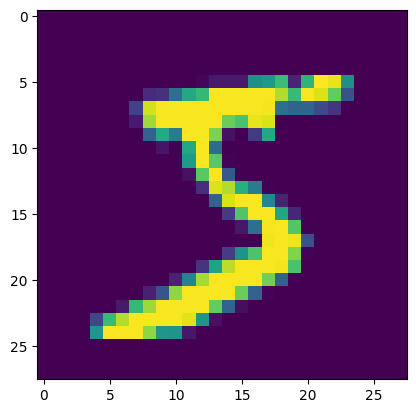

In [ ]:
# Primera images
plt.imshow(train_data[0])

# Target de la imagen
train_labels[0]

## Creacion del modelo

Primero se crea el objeto `models` el cual tiene un metodo llamado `models.Sequential()`, esto lo que hace es crear un modelo con 2 capas de neuronas, de las cuales una es consecuente a la otra. 

Una vez que el modelo esta creado, entonces usamos `model.add()`, la cual permite agrega una capa de neuronas o perceptrones. Esta funcion puede recibir como argumento al objeto `layers.Dense()`, la cual crea una capa de neuronas de acuerdon con las especificaciones de los siguientes argumentos:

* **Numero de neuronas**: este es el numero de neuronas que tendra cada capa. Puedo solo especificarse el numero.
* `activation`: el tipo de funcion matematica que la neurona va a utilizar para generar el aprendizaje. Un ejemplo es la funcion '**relu'** o **softmax**. 
* `input_shape`: lo que hace es definir las dimensiones de cada objeto o array que va a entrar para entrenamiento, prueba y prediccion.

Finalmente tenemos a la funcion `compile()`. Esta es una funcion que se define por los argumentos:

* `optimizer` : es el algoritmo de optimización que se utilizará para ajustar los pesos de la red neuronal durante el entrenamiento. En este caso, el optimizador es `rmsprop`, que es un algoritmo popular de optimización basado en la raíz cuadrada media móvil de los gradientes.
* `loss` : es la función de pérdida que se utilizará para medir la discrepancia entre las salidas predichas y las salidas reales de la red neuronal. En este caso, la función de pérdida es `categorical_crossentropy`, que se usa comúnmente en problemas de clasificación de varias categorías.
* `metrics` : es una lista de métricas que se utilizarán para evaluar la precisión del modelo durante el entrenamiento y la evaluación. En este caso, solo se especifica una métrica, `accuracy`, que es la fracción de muestras correctamente clasificadas.





In [ ]:
# Determinamos el tipo de modelo, en este caso secuencial
model = models.Sequential()

# Agregas una capa de neuronas y estableces la funcion en las que se basan
model.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))

# Agregamos otra capa de neuronas con 10 salidas, porque son 10 targets
model.add(layers.Dense(10, activation = 'softmax' ))

# Agregamos compilador del modelo. Loss es una funcion de perdida o error y metrics es como el modelo va a evaluar su efectividad
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

# Te dice las caracteristicas del modelo. Output shape te dice las neuronas necesarias y Param los parametros que evaluan c/capa 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Preprocesamiento del modelo

### Reshape y estandarizacion de pixeles de X

Hacemos un reshape de los samples de entrenamiento y de prueba, haciendo que sean 60k arreglos con sub arreglos con un shape de 1 fila y n numeros de columnas, que se definen como el ancho de la imagen (a pixels) por el largo de la imagen (l pixels):

$n \ columnas = (a \ pixels)  (\ l \ pixels)$ 

Al hacer esto, el shape de cada imagen se convierte en un arreglo de 1 sola dimension, haciendo flat al arreglo. Esto se hace con ayuda de la funcion `reshape()` y optimiza el proceso de la red neuronal.

Por otro lado, usamos la funcion `astype()` para pasar los numero a float y asi procesar mejor los datos dentro del modelo. Despues los estandarizamos al dividirlo entre 255, que es la magnitud mas grande que puede tener un pixel.  

In [ ]:
# Reshape y estandarizacion de datos de entrenamiento
x_train = train_data.reshape((train_data.shape[0]), train_data.shape[1] * train_data.shape[2])
x_train = x_train.astype('float32') / 255

# Reshape y estandarizacion de datos de prueba
x_test = test_data.reshape(test_data.shape[0], test_data.shape[1] * test_data.shape[2])
x_test = x_test.astype('float32') / 255

### Transformacion de labels en Y

Usamos la funcion `to_categorical()` para convertir las categorias de los datos en vectores. Si hay 9 categorias, entonces el vector tendra 9 variables diferentes y solo 1 de las variables se marcaran por el valor de 1.

In [ ]:
# Transformacion de categorias en vector
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# Le pone valor de 1 a la categoria correspondiente dentro del vector
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Entrenamiento del modelo

Usamos `model.fit()` para ingresar las variables de entrenamiento, incluyendo el sample y el objetivo. Despues tienes 2 argumentos mas:

* `epochs` = es el numero de iteraciones que hace el modelo sobre si mismo para mejorar la eficiencia de la red neuronal.
* `batch_size` = es el numero que contiene cada muestra de datos con los que itera. Si es igual a 100, entonces agarrara 100 rows diferentes para hacer 1 epoca o iteracion, en la siguiente epoca agarrara otras 100 rows y asi sucesivamente. Esto perfecciona al modelo una y otra vez.

In [ ]:
# Se entrena al modelo con 5 iteraciones
model.fit(x_train, y_train, epochs = 5, batch_size= 128)

Epoch 1/5
469/469 [==============================] - 7s 3ms/step - loss: 0.2673 - accuracy: 0.9218
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1074 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0711 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0516 - accuracy: 0.9843
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0391 - accuracy: 0.9884


La funcion `model.evaluate()` recibe las variables de prueba o testing. Tanto el sample o `x` como `1er` argumento, y el target o `y` en el `2do` argumento.

In [ ]:
# Funcion de evaluacion de error 
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9789


[0.06984685361385345, 0.9789000153541565]

# Red Neuronal desde 0 y sin Framework

## Data

La funcion `make_gaussian_quantiles()` nos ayuda a crear datos de tipo gaussianos para circulos. Estableceos que no hay mean, la covarianza es de 0.1 y se tienen N numero de muestras creadas.

Por otro lado, tenemos que e set de datos sera de 2 dimensiones (n_features) y habran 2 clases (n_classes) a clasificar.

Shuffle ayuda a revolver los datos y no hay semilla para el random state.

In [ ]:
N = 1000

# Creamos la data
X, Y = make_gaussian_quantiles(mean = None,
                        cov = 0.1,
                        n_samples = N,
                        n_features = 2,
                        n_classes= 2,
                        shuffle = True,
                        random_state= None)

In [ ]:
# Sample de datos divididos en 2 columnas
X

array([[ 0.09680565, -0.02211425],
       [ 0.36108466,  0.53716076],
       [-0.39749078, -0.13035066],
       ...,
       [ 0.40501879, -0.11368033],
       [ 0.36186956,  0.35640354],
       [ 0.27349079, -0.11484517]])

In [ ]:
# Target de categorizacion
Y

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

<Axes: >

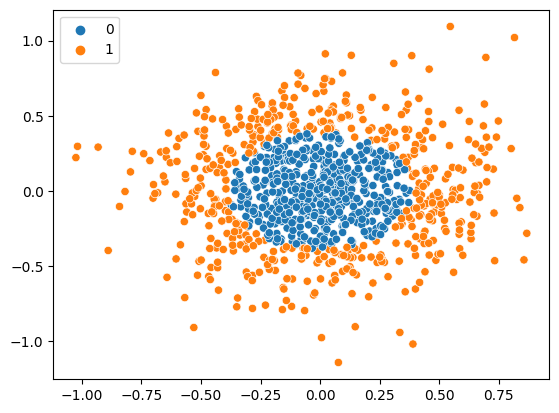

In [ ]:
# Graficar puntos de X separados por categoria
sns.scatterplot(data = X, x = X[:,0],y= X[:,1], hue = Y)

## Creacion de capas

Esta funcion crea las capas de neuronas, en donde los parametros W se refieren a los pesos de las neuronas y b al bias de cada capa de las neuronas. 

El bias nos ayuda a controlar cuánta activación es necesaria para que la neurona dispare una señal. Si el bias es alto, la neurona será más propensa a disparar una señal, incluso si la entrada es relativamente baja. Si el bias es bajo, la neurona necesitará una entrada más alta para disparar una señal.

In [ ]:
def initialize_parameters_deep(layers_dim):
  # Crea diccionario vacio para alvergar pesos y bias
  parameters = {}

  # Cuenta los datos que entran en el argumento
  L = len(layers_dim)

  # Crean una lista de pesos y bias para cada capa, excepto la final
  for l in range(0, L-1):

    # Crea la lista de pesos que va de -1 a 1 con un shape de l x l+1 para conectar valores por producto punto
    parameters['W'+str(l+1)] = (2 * np.random.rand(layers_dim[l], layers_dim[l+1]) ) -1
    
    # Crea la lista de bias que va de -1 a 1 con solo 1 fila
    parameters['b'+str(l+1)] = (2 * np.random.rand(1, layers_dim[l+1]) ) -1
  return parameters 

Esta estructura representa 2 features de entrada, 2 capas ocultas con 4 y 8 neuronas y 1 neurona que clasifica si los datos son de 1 tipo o de otro.

In [ ]:
# Defines las dimensiones de la red
layers_dims = [2, 4, 8, 1]

# Creas las capas
params = initialize_parameters_deep(layers_dims)
params

{'W1': array([[-0.20161265, -0.54701826, -0.81639185,  0.62189849],
        [-0.3181046 , -0.18835864,  0.8846412 , -0.90747578]]),
 'b1': array([[ 0.5124146 ,  0.10896344,  0.77123226, -0.69924268]]),
 'W2': array([[-0.78488621,  0.53397943,  0.7774123 ,  0.71241296, -0.89419876,
          0.2344309 ,  0.19702511, -0.87102237],
        [-0.79463926, -0.43604209, -0.23732706,  0.98383741,  0.48707465,
          0.16998627, -0.61808861, -0.1221599 ],
        [ 0.51339705,  0.53902946,  0.0621044 ,  0.05954022,  0.96016552,
          0.23930349,  0.31430638,  0.11155701],
        [-0.57612216,  0.05491511, -0.4716143 ,  0.46515856,  0.83688979,
          0.61348197,  0.75749386, -0.43690811]]),
 'b2': array([[ 0.7379254 ,  0.49778808,  0.97782605,  0.7765202 ,  0.31947381,
         -0.28843294,  0.0974163 , -0.66731762]]),
 'W3': array([[ 0.10773983],
        [-0.66491628],
        [ 0.88438367],
        [-0.57980542],
        [ 0.61079989],
        [ 0.62264281],
        [-0.37163674],


## Producto matricial y funciones de activacion

Ahora haremos la primera operacion de producto matricial entre los valores de X y la capa W1 con la funcion `np.matmul()`. Esta funcion puede ser sustituida tambien con @.

In [ ]:
print(f'Shape de X {X.shape}')
print(f'Shape de Capa 1 {params["W1"].shape}')

Shape de X (1000, 2)
Shape de Capa 1 (2, 4)


In [ ]:
np.matmul(X, params['W1'])

array([[-0.0124826 , -0.04878905, -0.09859452,  0.08027144],
       [-0.24367254, -0.29869877,  0.18040796, -0.26290238],
       [ 0.12160431,  0.24198739,  0.20919467, -0.12890885],
       ...,
       [-0.04549467, -0.20014   , -0.43122034,  0.35504272],
       [-0.18633109, -0.26508095,  0.01986189, -0.09838145],
       [-0.01860643, -0.12797238, -0.32487242,  0.27430272]])

In [ ]:
np.all(X@params['W1'] == np.dot(X, params['W1']))

True

Al saber lo anterior, podemos nombrar los datos de entrada o de X como A0. 

A0 tiene que ser convertido a traves del producto matricial con los pesos de cada neurona sumados a bias de error que podrian tener estos datos. A esta operacion se le conoce como Z.

Finalmente los datos resultantes de Z pasaran a traves de la funcion de activacion para que no sean un solo operaciones lineales y se puedan obtener distintos resultados. A este resultado se le conoce como A1.

El proceso se repite sucesivamente hasta la capa final, por lo que podemos decir que los datos de entrada para la siguiente capa serán A1, harán un producto matricial con los pesos y bias de las neuronas para dar Z2 que finalmente se convertirán en A2 al pasar por la función de activación.

Finalmente, usamos la funcion sigmoide en la ultima capa oculta para obtener la probabilidad de Z3, ya que A3 sera el output que recibira la neurona para categorizar los datos.

In [ ]:
# Datos de entrada de la primera capa
params['A0'] = X

# Procesos de producto matricial y transformacion por funcion de activacion en 1ra capa
params['Z1'] = np.matmul(params['A0'], params['W1'] + params['b1'])
params['A1'] = relu(params['Z1'])

# Procesos de producto matricial y transformacion por funcion de activacion en 2da capa
params['Z2'] = np.matmul(params['A1'], params['W2'] + params['b2'])
params['A2'] = relu(params['Z2'])

# Procesos de producto matricial y transformacion por funcion de activacion en 3ra capa
params['Z3'] = np.matmul(params['A2'], params['W3'] + params['b3'])
params['A3'] = sigmoid(params['Z3'])

# Generamos el output para categorizar
output = params['A3']

# Estos son algunos de los resultados del entrenamiento del modelo
output[:20]

array([[0.44692498],
       [0.00883615],
       [0.20307171],
       [0.22577545],
       [0.3052259 ],
       [0.0480454 ],
       [0.08718886],
       [0.33596878],
       [0.05933065],
       [0.07745143],
       [0.14383252],
       [0.08507987],
       [0.43456364],
       [0.28404646],
       [0.22521765],
       [0.10376093],
       [0.30903826],
       [0.30551206],
       [0.30520615],
       [0.23120908]])

## Backpropagation

Para el backpropagation debemos recordar que tenemos que calcular $δ[l]$ con la siguiente ecuacion:

1. $δ[l] = \frac{𝒪C}{𝒪a[L]} * \frac{𝒪a[L]}{𝒪z[L]} $

por lo tanto, podemos definir que:

2. $δ[l] = δ[Z_3] = MSE(y_{predicha} - y_{real}) * f_{sigmoide}^{'}(A_3)$

ya que MSE es el cambio que existe en la funcion de coste con respecto a la funcion de activacion, la cual usa la derivada de la funcion sigmoide de la ultima capa oculta y los datos de salida o output  para calcular $δ[Z_3]$.

Por otro lado, para calcular $ W[l]$, debemos hacer un producto matricial de la siguiente forma (considerando un `l = 3` para este caso):

3. $ W[l] = δ[W_3] = [A_{l-1}] δ[Z_l]$

4. $ δ[W_3] = [A_2]^{T} δ[Z_3]$

el cual va variando su l de acuerdo con el peso de la capa. 

Ya que tenemos $δ[Z_3]$ y $δ[W_3]$, podemos calcular los diferenciales de la capa numero 2 con la siguiente ecuacion:

5. $δ[l-1] = δ[Z_2] = δ[Z_l] [W_l]^{T} * \frac{𝒪a[l-1]}{𝒪z[l-1]}$ 

6. $ δ[Z_2] = δ[Z_3] [W_3]^{T} * f_{relu}^{'}(A_2) $

haciendo un producto matricial entre nuestro delta de pesos y de datos de entrada, el cual es multiplicado por la derivada de la funcion Relu para las siguientes capas.

Finalmente, las ecuaciones 3 y 5 funcionan para el resto de las capas ocultas, a excepcion de que se este utilizando alguna otra funcion de activacion dentro de las capas ocultas.

In [ ]:
# Backpropagation en ultima capa. Usa las derivadas de MSE y de la funcion sigmoide
params['dZ3'] = mse(Y, output, True) * df(sigmoid, params['A3'])

# Crea la derivada de los pesos a partir del producto matricial
params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

# Backpropagation capa 2 
params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * df(relu, params['A2'])
params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

# Backpropagation capa 1 
params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * df(relu, params['A1'])
params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])


## Descenso de gradiente

Para calcular el descenso del gradiente, debemos definir un $α$ o learning rate. Este valor multiplicará la diferencia entre los valores de los pesos (W) y los bias (b) con sus respectivas derivadas. Por lo tanto, podemos decir que las ecuaciones se verán como:

1. $[W_{l \ actualizado}] = [W_{l  \ original}] - δ[W_l] * α$
2. $[b_{l \ actualizado}] = [b_{l  \ original}] - 𝚫[W_{l}] * α$

en donde:
* $[W_{l  \ original}]$ y $[b_{l  \ original}]$ representan los pesos y los bias que calculamos anteriormente. 

* $𝚫[W_{l}]$ representa el delta o diferencial promedio de los pesos ($δ[W_l]$) que calculamos anteriormente. 

* $[W_{l \ actualizado}] $ y $[b_{l \ actualizado}] $ representan los pesos y los bias actualizados a partir del descenso del gradiente.

`NOTA`: corroborar que no se deba calcular un diferencial para el bias

In [ ]:
# Definimos alpha
alpha = 0.0001

# Decenso del gradiente para los pesos y los bias de las capas 3, 2 y 1
params['W3'] = params['W3'] - params['dW3'] * alpha
params['b3'] = params['b3'] - np.mean(params['dW3'], axis = 0, keepdims=True) * alpha

params['W2'] = params['W2'] - params['dW2'] * alpha
params['b2'] = params['b2'] - np.mean(params['dW2'], axis = 0, keepdims=True) * alpha

params['W1'] = params['W1'] - params['dW1'] * alpha
params['b1'] = params['b1'] - np.mean(params['dW1'], axis = 0, keepdims=True) * alpha

## Automatizacion del entrenamiento, backpropagation y descenso del gradiente

In [ ]:
def train(x_data, alpha, params, training = True):

  # ENTRENAMIENTO

  # Datos de entrada
  params['A0'] = x_data

  # Procesos de producto matricial y transformacion por funcion de activacion en 1ra, 2da y 3ra capa
  params['Z1'] = np.matmul(params['A0'], params['W1'] + params['b1'])
  params['A1'] = relu(params['Z1'])

  params['Z2'] = np.matmul(params['A1'], params['W2'] + params['b2'])
  params['A2'] = relu(params['Z2'])

  params['Z3'] = np.matmul(params['A2'], params['W3'] + params['b3'])
  params['A3'] = sigmoid(params['Z3'])

  # Datos de salida
  output = params['A3']

  if training:
    # BACKPROPAGATION

    # Backpropagation en ultima capa, capa 2 y capa 1
    params['dZ3'] = mse(Y, output, True) * df(sigmoid, params['A3'])
    params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

    params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * df(relu, params['A2'])
    params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

    params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * df(relu, params['A1'])
    params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])


    # DESCENSO DEL GRADIENTE

    # Decenso del gradiente para los pesos y los bias de las capas 3, 2 y 1
    params['W3'] = params['W3'] - params['dW3'] * alpha
    params['b3'] = params['b3'] - np.mean(params['dW3'], axis = 0, keepdims=True) * alpha

    params['W2'] = params['W2'] - params['dW2'] * alpha
    params['b2'] = params['b2'] - np.mean(params['dW2'], axis = 0, keepdims=True) * alpha

    params['W1'] = params['W1'] - params['dW1'] * alpha
    params['b1'] = params['b1'] - np.mean(params['dW1'], axis = 0, keepdims=True) * alpha

  return output

## ENTRENAMIENTO

Vamos a entrenar al modelo

In [ ]:
# Defines las dimensiones de la red
layers_dims = [2, 4, 8, 1]

# Creas las capas
params = initialize_parameters_deep(layers_dims)

# Creas lista vacia para almacenar el error de las distintas epocas
errors = []

# Iteras la red neuronal con n numero de epocas
for _ in range(50000):
  output = train(X, 0.001, params)

  # Guarde el MSE cada 50 iteraciones
  if _ % 1000 == 0:
    print(mse(Y, output))
    errors.append(mse(Y, output))

0.2950455184591388
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966
0.25341676308027966


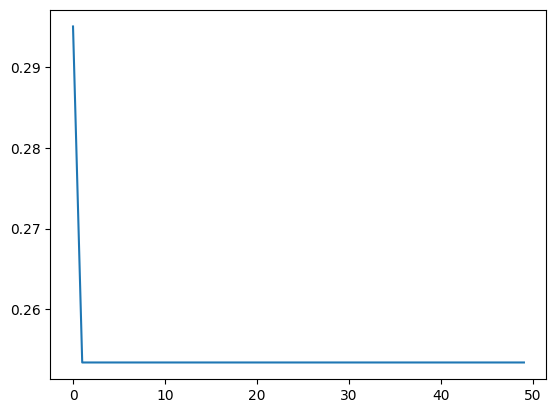

In [ ]:
plt.plot(errors)

## Probando nuevos datos

<Axes: >

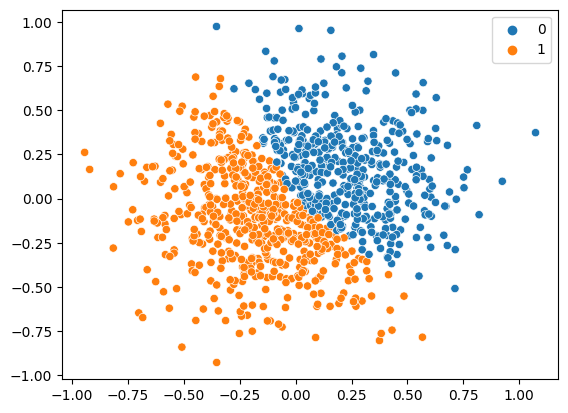

In [ ]:
# Creamos nuevos datos
data_test, Y = make_gaussian_quantiles(mean = None,
                        cov = 0.1,
                        n_samples = N,
                        n_features = 2,
                        n_classes= 2,
                        shuffle = True,
                        random_state= None)

# Entrenamos el modelo
y = train(data_test,0.000002,params,training=False)

# Categorizamos datos en 1 y 0 (p >= 0.5, p < 0.5)
y1 = np.where(y >= 0.5, 1,0)

# Observamos como categoriza los datos
sns.scatterplot(data_test, x=data_test[:,0], y=data_test[:,1], hue= np.matrix.flatten(y1))

# Red Neuronal para Clasificacion Binaria

In [ ]:
# Datos con las 10k palabras mas comunes
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
# Estas son palabras convertidas a numeros por keras para las redes neuronales. Los labels tambien son numeros
print(train_labels[0],train_data[0])

1 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# Indice de palabras para el dataset
word_index = imdb.get_word_index()
print(word_index)

1641221/1641221 [==============================] - 1s 1us/step
{'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, 'sonja': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, 'hanging': 2345, 'woody': 2289, 'trawling': 52008, "hold's": 52009, 'comically': 11307, 'localized': 40830, 'disobeying': 30568, "'royale": 52010, "harpo's": 40831, 'canet': 52011, 'aileen': 19313, 'acurately': 52012, "diplomat's": 52013, 'rickman': 25242, 'arranged': 6746, 'rumbustious': 52014, 'familiarness': 52015, "spider'": 52016, 'hahahah': 68804, "wood'": 52017, 'transvestism': 40833, "hangin'": 34702, 'bringing': 2338, 'seamier': 40834, 'wooded': 34703, 'bravora': 52018, 'grueling': 16817, 'wooden': 1636, 'wednesday': 16818, "'prix": 52019, 'altagracia': 34704, 'circuitry': 52020, 'crotch': 11585, 'busybody': 57766, "tart'n'tangy": 52021, 'burgade': 14129, 'thrace': 52023, "tom's": 11038, 'snuggles': 52025, 'francesco': 29114, 'complainers': 52027, 'templarios': 52125, '272': 40835, '273': 52028, 'zani

In [ ]:
# Voltear el dict para accesar a la palabra a traves de su valor
word_index = dict({(value, key) for (key,value) in dict(word_index).items()})

# Accesar a las palabras por medio del valor
for _ in train_data[0]:
  print(word_index.get(_))

the
as
you
with
out
themselves
powerful
lets
loves
their
becomes
reaching
had
journalist
of
lot
from
anyone
to
have
after
out
atmosphere
never
more
room
and
it
so
heart
shows
to
years
of
every
never
going
and
help
moments
or
of
every
chest
visual
movie
except
her
was
several
of
enough
more
with
is
now
current
film
as
you
of
mine
potentially
unfortunately
of
you
than
him
that
with
out
themselves
her
get
for
was
camp
of
you
movie
sometimes
movie
that
with
scary
but
and
to
story
wonderful
that
in
seeing
in
character
to
of
70s
musicians
with
heart
had
shadows
they
of
here
that
with
her
serious
to
have
does
when
from
why
what
have
critics
they
is
you
that
isn't
one
will
very
to
as
itself
with
other
and
in
of
seen
over
landed
for
anyone
of
and
br
show's
to
whether
from
than
out
themselves
history
he
name
half
some
br
of
and
odd
was
two
most
of
mean
for
1
any
an
boat
she
he
should
is
thought
frog
but
of
script
you
not
while
history
he
heart
to
real
at
barrel
but
when
from
one
bit
then
have
tw

Vectorizar un texto significa convertir un cuerpo de textos a numeros para que pueda ser procesado por un modelo de machine learning.

Para poder definir nuestros vectores requerimos de 2 dimensiones, la primera son las filas, las cuales son referentes al numero de arrays que tenemos. En este caso, nuestro set de entrenamiento tiene 25000 arrays con distintas palabras, por lo tanto tendremos 25000 vectores individuales como filas.

Por otro lado, hemos definido 10000 columnas para cada vector, esto se debe a que cuando solicitamos los datos de entrenamiento, establecimos que solo queriamos traer 10000 palabras diferentes en nuestro dataset de entrenamiento. 

Finalmente, cada vector tiene un cierto numero de palabras. Ejemplo, el primer vector tiene 218 palabras representadas por un numero especifico dentro del diccionario. Al momento de vectorizar, lo que hacemos es que establecemos que cada palabra es una columna, y si la palabra se encuentra dentro del vector que tenemos, entonces la posicion (m,n) = 1. Por el contrario, si el vector no tiene esa palabra, entonces sera un 0.

Esta transformacion nos sirve para que la red entienda y categorice las distintas palabras que se tienen en un texto.



In [ ]:
def vectorizar(sequences, dim = 10000):

  # Creamos un arreglo de ceros con shape de n x 10000
  results = np.zeros((len(sequences), dim))
  
  # Vectorizamos los datos de entrada
  for i, sequences in enumerate(sequences):
    results[i,sequences] = 1
  return results

In [ ]:
# Vectorizamos las X de entrenamiento y prueba, y despues los transforma en array con datos de tipo float
x_train = np.asarray(vectorizar(train_data)).astype('float32')
x_test = np.asarray(vectorizar(test_data)).astype('float32')

# Vectorizamos las Y de entrenamiento y prueba, y despues los transforma en array con datos de tipo float
y_train = np.asarray(vectorizar(train_labels)).astype('float32')
y_test = np.asarray(vectorizar(test_labels)).astype('float32')

# Imprimimos los 4 vectores
x_test, x_train ,y_train ,y_test

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],


A partir de los vectores, creamos un 3er dataset para la validacion del modelo debido a cuestiones eticas. Por lo tanto, la nueva secuencia para probar datos seria la siguiente:

$Entrenamiento → Validacion → Prueba$

In [ ]:
# Seleccionamos 10k y 15k vectores de los 25k que hay en x
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

# Seleccionamos 10k y 15k vectores de los 25k que hay en y
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Imprimir el set de datos
x_val, partial_x_train ,y_val ,partial_y_train

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 1., 0., 0.]], dtype=float32),
 array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],


In [ ]:
x_val.shape , partial_x_train.shape ,y_val.shape ,partial_y_train.shape 

((10000, 10000), (15000, 10000), (10000, 10000), (15000, 10000))

## Creacion y entrenamiento del modelo

El entrenamiento puede recibir un argumento extra llamado `validation_data` el cual recibe una tupla con los valores x,y de validacion. El set de datos de validacion se obtiene al partir el set de datos de entrenamiento en 2. 

In [ ]:
# Creamos modelo de tipo secuencial
model = models.Sequential()

# Generamos capas con 16 neuronas, activacion relu y con 10k vectores de entrada
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,1)))
model.add(layers.Dense(16, activation = 'relu'))

# Capa final con funcion binaria para categorizacion binaria
model.add(layers.Dense(1, activation = 'sigmoid'))

# Optimizacion del modelo por backpropagation y prediccion numerica
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

# Entrenamos data
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 10,
                    batch_size = 512,
                    validation_data= (x_val, y_val))

Epoch 1/10
30/30 [==============================] - 9s 76ms/step - loss: 0.6813 - accuracy: 0.9868 - val_loss: 0.6674 - val_accuracy: 0.9868
Epoch 2/10
30/30 [==============================] - 1s 38ms/step - loss: 0.6557 - accuracy: 0.9968 - val_loss: 0.6424 - val_accuracy: 0.9999
Epoch 3/10
30/30 [==============================] - 1s 37ms/step - loss: 0.6292 - accuracy: 0.9999 - val_loss: 0.6132 - val_accuracy: 0.9999
Epoch 4/10
30/30 [==============================] - 1s 37ms/step - loss: 0.5978 - accuracy: 0.9999 - val_loss: 0.5792 - val_accuracy: 0.9999
Epoch 5/10
30/30 [==============================] - 1s 37ms/step - loss: 0.5606 - accuracy: 0.9999 - val_loss: 0.5392 - val_accuracy: 0.9999
Epoch 6/10
30/30 [==============================] - 1s 36ms/step - loss: 0.5187 - accuracy: 0.9999 - val_loss: 0.4944 - val_accuracy: 0.9999
Epoch 7/10
30/30 [==============================] - 1s 36ms/step - loss: 0.4709 - accuracy: 0.9999 - val_loss: 0.4439 - val_accuracy: 0.9999
Epoch 8/10
30

In [ ]:
history.history

{'loss': [0.6813487410545349,
  0.6556566953659058,
  0.6291770935058594,
  0.5977635979652405,
  0.5606154203414917,
  0.5187044739723206,
  0.4708974063396454,
  0.4189065098762512,
  0.364612340927124,
  0.3090406358242035],
 'accuracy': [0.9868289828300476,
  0.9967641830444336,
  0.9999002814292908,
  0.9999002814292908,
  0.9999002814292908,
  0.9999002814292908,
  0.9999002814292908,
  0.9999002814292908,
  0.9999002814292908,
  0.9999002814292908],
 'val_loss': [0.6673914790153503,
  0.6423842906951904,
  0.6131765842437744,
  0.5792250633239746,
  0.5391712188720703,
  0.4943654239177704,
  0.4439450204372406,
  0.39045625925064087,
  0.3355976939201355,
  0.27892574667930603],
 'val_accuracy': [0.9868318438529968,
  0.9998999834060669,
  0.9998999834060669,
  0.9998999834060669,
  0.9998999834060669,
  0.9998999834060669,
  0.9998999834060669,
  0.9998999834060669,
  0.9998999834060669,
  0.9998999834060669]}

El objeto `model.fit().history` devuelve algunos de los parametros de evaluacion que hace el modelo. En este caso, nos ha regresado:

* `loss` : es el valor obtenido por la funcion de coste para la data de entrenamiento.
* `accuracy` : calcula el performance del modelo durante el entrenamiento. El modelo usa backpropagation y descenso del gradiente.
* `val_loss` : es el valor obtenido por la funcion de coste al momento de generar el proceso de cross-validation con la data de validacion.
* `val_accuracy` : calcula el performance del modelo durante la validacion. Se usa para detectar overfitting y mejorar la prediccion durante la validacion.

Para corroborar el overfitting de un modelo, podemos graficar los datos de loss y los de val_loss contra el numero de epocas. En caso de que haya overfitting, podemos observar que los valores de loss son mucho mayores que los valores de val_loss.

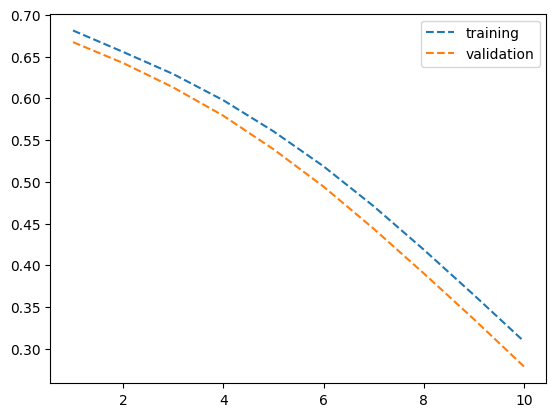

In [ ]:
# Transformar datos historicos de las epocas del modelo en arrays de 10 x  1
loss = np.array(history.history['loss']).reshape(len(history.history['loss']),1)
accuracy = np.array(history.history['accuracy']).reshape(len(history.history['accuracy']),1)
val_loss = np.array(history.history['val_loss']).reshape(len(history.history['val_loss']),1)
val_accuracy = np.array(history.history['val_accuracy']).reshape(len(history.history['val_accuracy']),1)

# Definir epocas
epoch = np.array([i for i in range(1, len(loss)+1)]) 

# Numero de epocas contra sus datos
plt.plot(epoch, loss, '--', label = 'training')
plt.plot(epoch, val_loss, '--', label = 'validation')
plt.legend()
plt.show()

In [ ]:
# Transformar datos historicos de las epocas del modelo en arrays de 10 x  1
loss = np.array(m1.history['loss']).reshape(len(m1.history['loss']),1)
accuracy = np.array(m1.history['accuracy']).reshape(len(m1.history['accuracy']),1)
val_loss = np.array(m1.history['val_loss']).reshape(len(m1.history['val_loss']),1)
val_accuracy = np.array(m1.history['val_accuracy']).reshape(len(m1.history['val_accuracy']),1)

# Definir epocas
epoch = np.array([i for i in range(1, len(loss)+1)]) 

# Numero de epocas contra sus datos
plt.plot(epoch, loss, '--', label = 'training')
plt.plot(epoch, val_loss, '--', label = 'validation')
plt.legend()

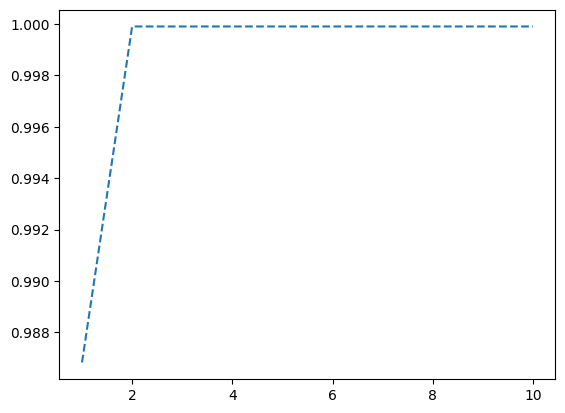

In [ ]:
# Numero de epocas contra sus datos de accuracy de validacion
plt.plot(epoch, val_accuracy, linestyle = '--', label = 'validation')
plt.show()

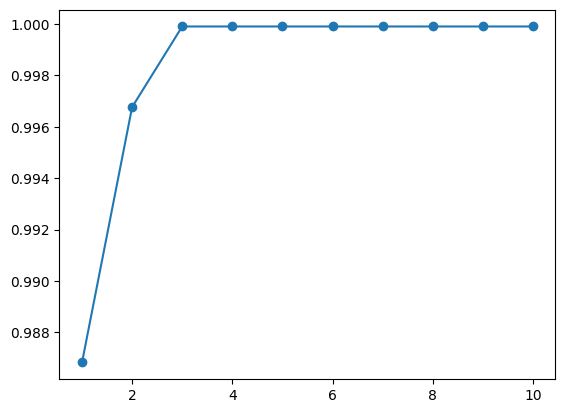

In [ ]:
# Numero de epocas contra sus datos de accuracy de entrenamiento
plt.plot(epoch, accuracy, label = 'training', marker = 'o')

In [ ]:
# Hacer la evaluacion del modelo con los datos de prueba
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.2790 - accuracy: 0.9999


[0.27898067235946655, 0.9998942017555237]

# Problemas y Soluciones para las redes neuronales


## Overfitting y Underfitting

El overfitting es un problema que ocurre cuando el modelo se aprende de memoria los datos en lugar de aprender acerca del problema que se le presenta. Esto se debe a que cada neurona se vuelve más especifica con los datos.

Generalmente, una de las formas más sencillas de reducir el overfitting es usando un modelo más pequeño para redes demasiado complejas (demasiados parámetros).

Por el otro lado, tener una red demasiado sencilla nos puede llevar al underfitting, porque no lograría adaptarse al problema siendo tan pequeña.

Actualmente no existe una receta de cocina para evitar el underfitting y el overfitting, ni para saber cuántas capas debería tener mi red ni cuantas neuronas debería tener cada capa, aun así, una técnica es empezar con un modelo muy pequeño y una vez cómo se comporta iterar


## Regularización

El termino de regularizacion viene de un problema de hacer los datos más regulares. Para esto, debemos disminuir la complejidad del modelo al reducir los pesos que arroja nuestra red al entrenar.

Para realizar este procedimiento, haremos uso de las siguientes expresiones:

1. $f_{costo} = ∑_{i=0}^{N} (y_{i} - ∑_{j = 0}^{M} X_{ij} W_{j})^{2}$
 
2. $Costo = f_{costo} + λ ∑_{j = 0}^{M} |W_{j}|$

3. $Costo = f_{costo} + λ ∑_{j = 0}^{M} W_{j}^{2}$

en donde la ecuacion 1 refiere al valor generado por la funcion de coste. La ecuacion 2 y 3 son utilizadas para modular el costo de la $f_{costo}$ gracias al termino de regularizacion, el cual castiga la función de perdida utilizando la suma del valor absoluto del peso de la neurona (en el caso de usar la norma L1) o la suma del peso de c/neurona al cuadrado (en caso de usar la norma L2) multiplicado por un $λ$. 

Si $λ$ es muy alta, entonces el termino va a castigar muchisimo al modelo y no permitira que este modelo converja. Por el otro lado, si $λ$ es muy baja, el modelo no va a ser castigado. Es por esto que se debe de jugar con valores intermedios de $λ$.


## Dropout

Otra técnica para reducir el overfitting es el Dropout

La universidad que planteo esto tuvo la idea haciendo fila en un banco. Observo que los cajeros cambiaban de lugar aleatoriamente cada vez que cierta cantidad de personas avanzaban en la fila. Esto lo hacen para reducir la posibilidad de conspiracion o fraude entre un cliente de la fila y un cajero.

Este ejemplo lo podemos aplicar a las redes neuronales, ya que las neuronas pueden ajustar demasiado sus pesos, causando el overfitting. Es por esto que el dropout mueve los valores de entrada para que la conspiración no sea tan alta.

Lo que hace la tecnica de dropout es apagar aleatoriamente y en c/época ciertas neuronas. Esto reduce el exceso de exactitud que ocasiona el overfitting en la red.

Para demostrar esto, crearemos una red que genere overfitting.

Epoch 1/50
30/30 [==============================] - 1s 37ms/step - loss: 8.8099e-04 - accuracy: 0.9999 - val_loss: 8.7740e-04 - val_accuracy: 0.9999
Epoch 2/50
30/30 [==============================] - 1s 37ms/step - loss: 8.8022e-04 - accuracy: 0.9999 - val_loss: 8.7664e-04 - val_accuracy: 0.9999
Epoch 3/50
30/30 [==============================] - 1s 37ms/step - loss: 8.7953e-04 - accuracy: 0.9999 - val_loss: 8.7592e-04 - val_accuracy: 0.9999
Epoch 4/50
30/30 [==============================] - 1s 36ms/step - loss: 8.7891e-04 - accuracy: 0.9999 - val_loss: 8.7534e-04 - val_accuracy: 0.9999
Epoch 5/50
30/30 [==============================] - 1s 36ms/step - loss: 8.7836e-04 - accuracy: 0.9999 - val_loss: 8.7474e-04 - val_accuracy: 0.9999
Epoch 6/50
30/30 [==============================] - 1s 36ms/step - loss: 8.7786e-04 - accuracy: 0.9999 - val_loss: 8.7425e-04 - val_accuracy: 0.9999
Epoch 7/50
30/30 [==============================] - 1s 35ms/step - loss: 8.7742e-04 - accuracy: 0.9999 - v

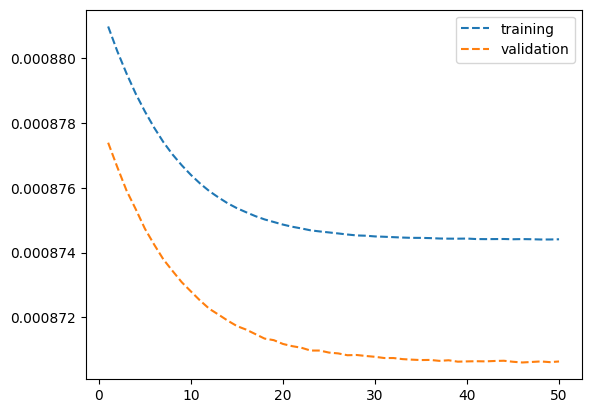

In [ ]:
# Creamos modelo de tipo secuencial
model2 = models.Sequential()

# Generamos capas con 16 neuronas, activacion relu y con 10k vectores de entrada
model2.add(layers.Dense(300, activation = 'relu', input_shape = (10000,1)))
model2.add(layers.Dense(300, activation = 'relu'))

# Capa final con funcion binaria para categorizacion binaria
model2.add(layers.Dense(1, activation = 'sigmoid'))

# Optimizacion del modelo por backpropagation y prediccion numerica
model2.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

# Entrenamos data
history2 = model.fit(partial_x_train, partial_y_train,
                    epochs = 50,
                    batch_size = 512,
                    validation_data= (x_val, y_val))

# Transformar datos historicos de las epocas del modelo en arrays de 10 x  1
loss2 = np.array(history2.history['loss']).reshape(len(history2.history['loss']),1)
accuracy2 = np.array(history2.history['accuracy']).reshape(len(history2.history['accuracy']),1)
val_loss2 = np.array(history2.history['val_loss']).reshape(len(history2.history['val_loss']),1)
val_accuracy2 = np.array(history2.history['val_accuracy']).reshape(len(history2.history['val_accuracy']),1)

# Definir epocas
epoch2 = np.array([i for i in range(1, len(loss2)+1)]) 

# Numero de epocas contra sus datos
plt.plot(epoch2, loss2, '--', label = 'training')
plt.plot(epoch2, val_loss2, '--', label = 'validation')
plt.legend()
plt.show()

In [ ]:
# Hacer la evaluacion del modelo con los datos de prueba
model2.evaluate(x_test, y_test)

782/782 [==============================] - 6s 7ms/step - loss: 0.6936 - accuracy: 0.9871


[0.693612813949585, 0.9871261715888977]

## Modelo con REGULARIZACION

Si bien, el modelo tiene un bajo overfitting cerca de las 20 epocas, podemos usar la el argumento `kernel_regularizer` para acceder a los metodos de regularizacion. Este regularizador se coloca dentro de las capas ocultas.

Aqui establecemos el tipo de norma y el valor que le corresponde a $\lambda$ con las siguientes lineas de codigo:

```
kernel_regularizer = regularizers.l1(0.001)

```

```
kernel_regularizer = regularizers.l2(0.001)
```



Epoch 1/25
30/30 [==============================] - 2s 55ms/step - loss: 8.7440e-04 - accuracy: 0.9999 - val_loss: 8.7060e-04 - val_accuracy: 0.9999
Epoch 2/25
30/30 [==============================] - 1s 37ms/step - loss: 8.7442e-04 - accuracy: 0.9999 - val_loss: 8.7060e-04 - val_accuracy: 0.9999
Epoch 3/25
30/30 [==============================] - 1s 36ms/step - loss: 8.7440e-04 - accuracy: 0.9999 - val_loss: 8.7057e-04 - val_accuracy: 0.9999
Epoch 4/25
30/30 [==============================] - 1s 36ms/step - loss: 8.7441e-04 - accuracy: 0.9999 - val_loss: 8.7060e-04 - val_accuracy: 0.9999
Epoch 5/25
30/30 [==============================] - 1s 36ms/step - loss: 8.7441e-04 - accuracy: 0.9999 - val_loss: 8.7061e-04 - val_accuracy: 0.9999
Epoch 6/25
30/30 [==============================] - 1s 36ms/step - loss: 8.7440e-04 - accuracy: 0.9999 - val_loss: 8.7059e-04 - val_accuracy: 0.9999
Epoch 7/25
30/30 [==============================] - 1s 36ms/step - loss: 8.7441e-04 - accuracy: 0.9999 - v

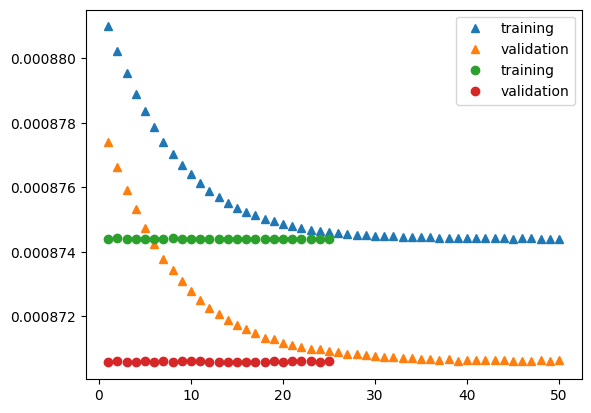

In [ ]:
from keras import regularizers

# Creamos modelo de tipo secuencial
model3 = models.Sequential()

# Generamos capas con 300 neuronas, activacion relu y con 10k vectores de entrada. Traen regularizador con norma L2
model3.add(layers.Dense(300, activation = 'relu', input_shape = (10000,1), kernel_regularizer = regularizers.l2(0.001) ))
model3.add(layers.Dense(300, activation = 'relu', kernel_regularizer = regularizers.l2(0.001) ))

# Capa final con funcion binaria para categorizacion binaria
model3.add(layers.Dense(1, activation = 'sigmoid'))

# Optimizacion del modelo por backpropagation y prediccion numerica
model3.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

# Entrenamos data
history3 = model.fit(partial_x_train, partial_y_train,
                    epochs = 25,
                    batch_size = 512,
                    validation_data= (x_val, y_val))

# Transformar datos historicos de las epocas del modelo en arrays de 10 x  1
loss3 = np.array(history3.history['loss']).reshape(len(history3.history['loss']),1)
accuracy3 = np.array(history3.history['accuracy']).reshape(len(history3.history['accuracy']),1)
val_loss3 = np.array(history3.history['val_loss']).reshape(len(history3.history['val_loss']),1)
val_accuracy3 = np.array(history3.history['val_accuracy']).reshape(len(history3.history['val_accuracy']),1)

# Definir epocas
epoch3 = np.array([i for i in range(1, len(loss3)+1)]) 

# Numero de epocas contra sus datos
plt.plot(epoch2, loss2, '^', label = 'training')
plt.plot(epoch2, val_loss2, '^', label = 'validation')
plt.plot(epoch3, loss3, 'o', label = 'training')
plt.plot(epoch3, val_loss3, 'o', label = 'validation')
plt.legend()
plt.show()

Podemos observar que con el metodo de regularizacion disminuimos la cantidad de epocas necesarias para llegar al error minimo. La regularizacion es denotado por los circulos. 

In [ ]:
model3.evaluate(x_test, y_test)

782/782 [==============================] - 6s 7ms/step - loss: 0.9958 - accuracy: 0.9999


[0.9957857131958008, 0.9998942017555237]

## Modelo con DROPOUT

Los codigos que habilitan al dropout se colocan entre las capas con la finalidad de inactivar las neuronas de la capa anterior. Esto se logra con el siguiente codigo:

```
model.add(layers.Dropout(0.5))
```

En donde el valor 0.5 representa la fraccion de neuronas que se van a apagar aleatoriamente.

Epoch 1/30
30/30 [==============================] - 2s 55ms/step - loss: 8.7441e-04 - accuracy: 0.9999 - val_loss: 8.7060e-04 - val_accuracy: 0.9999
Epoch 2/30
30/30 [==============================] - 1s 36ms/step - loss: 8.7441e-04 - accuracy: 0.9999 - val_loss: 8.7057e-04 - val_accuracy: 0.9999
Epoch 3/30
30/30 [==============================] - 1s 36ms/step - loss: 8.7440e-04 - accuracy: 0.9999 - val_loss: 8.7059e-04 - val_accuracy: 0.9999
Epoch 4/30
30/30 [==============================] - 1s 36ms/step - loss: 8.7441e-04 - accuracy: 0.9999 - val_loss: 8.7058e-04 - val_accuracy: 0.9999
Epoch 5/30
30/30 [==============================] - 1s 35ms/step - loss: 8.7440e-04 - accuracy: 0.9999 - val_loss: 8.7063e-04 - val_accuracy: 0.9999
Epoch 6/30
30/30 [==============================] - 1s 35ms/step - loss: 8.7441e-04 - accuracy: 0.9999 - val_loss: 8.7061e-04 - val_accuracy: 0.9999
Epoch 7/30
30/30 [==============================] - 1s 35ms/step - loss: 8.7440e-04 - accuracy: 0.9999 - v

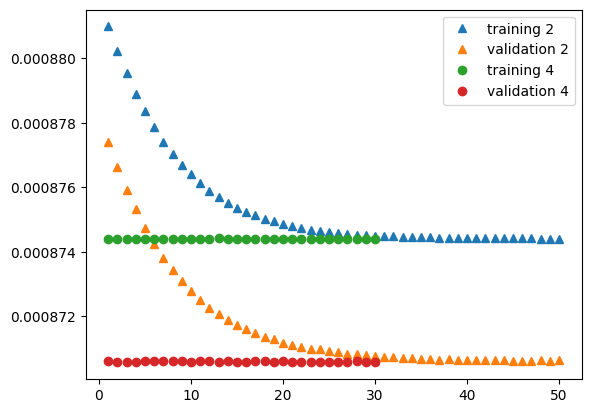

In [ ]:
# Creamos modelo de tipo secuencial
model4 = models.Sequential()

# Generamos capas con 300 neuronas, activacion relu y con 10k vectores de entrada. Tienen manejan dropout.
model4.add(layers.Dense(300, activation = 'relu', input_shape = (10000,1)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(300, activation = 'relu'))
model4.add(layers.Dropout(0.5))

# Capa final con funcion binaria para categorizacion binaria
model4.add(layers.Dense(1, activation = 'sigmoid'))

# Optimizacion del modelo por backpropagation y prediccion numerica
model4.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

# Entrenamos data
history4 = model.fit(partial_x_train, partial_y_train,
                    epochs = 30,
                    batch_size = 512,
                    validation_data= (x_val, y_val))

# Transformar datos historicos de las epocas del modelo en arrays de 10 x  1
loss4 = np.array(history4.history['loss']).reshape(len(history4.history['loss']),1)
accuracy4 = np.array(history4.history['accuracy']).reshape(len(history4.history['accuracy']),1)
val_loss4 = np.array(history4.history['val_loss']).reshape(len(history4.history['val_loss']),1)
val_accuracy4 = np.array(history4.history['val_accuracy']).reshape(len(history4.history['val_accuracy']),1)

# Definir epocas
epoch4 = np.array([i for i in range(1, len(loss4)+1)]) 

# Numero de epocas contra los datos del modelo 2 vs 4
plt.plot(epoch2, loss2, '^', label = 'training 2')
plt.plot(epoch2, val_loss2, '^', label = 'validation 2')
plt.plot(epoch4, loss4, 'o', label = 'training 4')
plt.plot(epoch4, val_loss4, 'o', label = 'validation 4')
plt.legend()
plt.show()

Podemos observar que con el metodo de dropout disminuimos la cantidad de epocas necesarias para llegar al error minimo. La regularizacion es denotado por los circulos. 

In [ ]:
model4.evaluate(x_test, y_test)

782/782 [==============================] - 6s 7ms/step - loss: 0.6931 - accuracy: 0.9999


[0.6931388974189758, 0.9998942017555237]

# Modelo de Clasificacion Multiple

In [ ]:
def vectorizar(sequences, dim = 10000):

  # Creamos un arreglo de ceros con shape de n x 10000
  results = np.zeros((len(sequences), dim))
  
  # Vectorizamos los datos de entrada
  for i, sequences in enumerate(sequences):
    results[i,sequences] = 1
  return results

# Datos con las 10k palabras mas comunes
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [ ]:
# Indice de palabras para el dataset
word_index = reuters.get_word_index()

# Voltear el dict para accesar a la palabra a traves de su valor
word_index = dict({(value, key) for (key,value) in dict(word_index).items()})

# Vectorizamos las X de entrenamiento y prueba
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

# Hacemos vectores de las categorias o Y de entrenamiento y prueba
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# Medimos el numero de categorias en la categorizacion
y_train[0].shape

(46,)

## Creacion del modelo

In [ ]:
# Creas modelo para categorizacion con softmax
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))

# El numero de neuronas de categorizacion depende del numero maximo de categorias
model.add(layers.Dense(y_train[0].shape[0], activation='softmax'))

# Se define optimizador
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc']   
             )

## Separacion de datos

In [ ]:
# Separacion de X para entrenamiento y validacion
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

# Separacion de X para entrenamiento y validacion
y_val = y_train[:1000]
partial_y_train =  y_train[1000:]

## Entrenamiento

In [ ]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 36ms/step - loss: 2.7807 - acc: 0.5140 - val_loss: 1.8644 - val_acc: 0.6180
Epoch 2/9
16/16 [==============================] - 0s 19ms/step - loss: 1.5534 - acc: 0.6802 - val_loss: 1.3777 - val_acc: 0.6920
Epoch 3/9
16/16 [==============================] - 0s 20ms/step - loss: 1.1844 - acc: 0.7359 - val_loss: 1.1959 - val_acc: 0.7320
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.9723 - acc: 0.7904 - val_loss: 1.0765 - val_acc: 0.7660
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.8152 - acc: 0.8239 - val_loss: 0.9990 - val_acc: 0.7820
Epoch 6/9
16/16 [==============================] - 0s 20ms/step - loss: 0.6826 - acc: 0.8529 - val_loss: 0.9552 - val_acc: 0.7940
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5744 - acc: 0.8791 - val_loss: 0.9231 - val_acc: 0.7980
Epoch 8/9
16/16 [==============================] - 0s 19ms/step - loss: 0.4854 - acc: 0.89

## Visualizacion Overfitting

Dado que la curva de perdida de entrenamiento y validacion son distintas, podemos decir que hay overfitting.

Para resolver esto, disminuye la cantidad de epocas que necesita el modelo. Tal vez dejar elmodelo con 5 epocas.

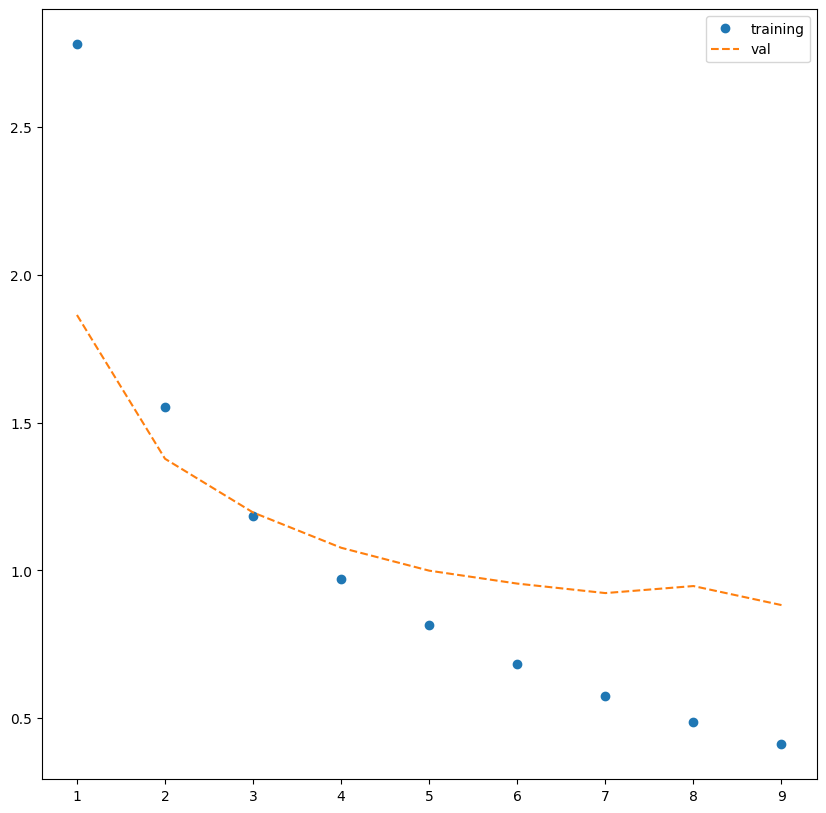

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Observamos valores de perdida contra las epocas
fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

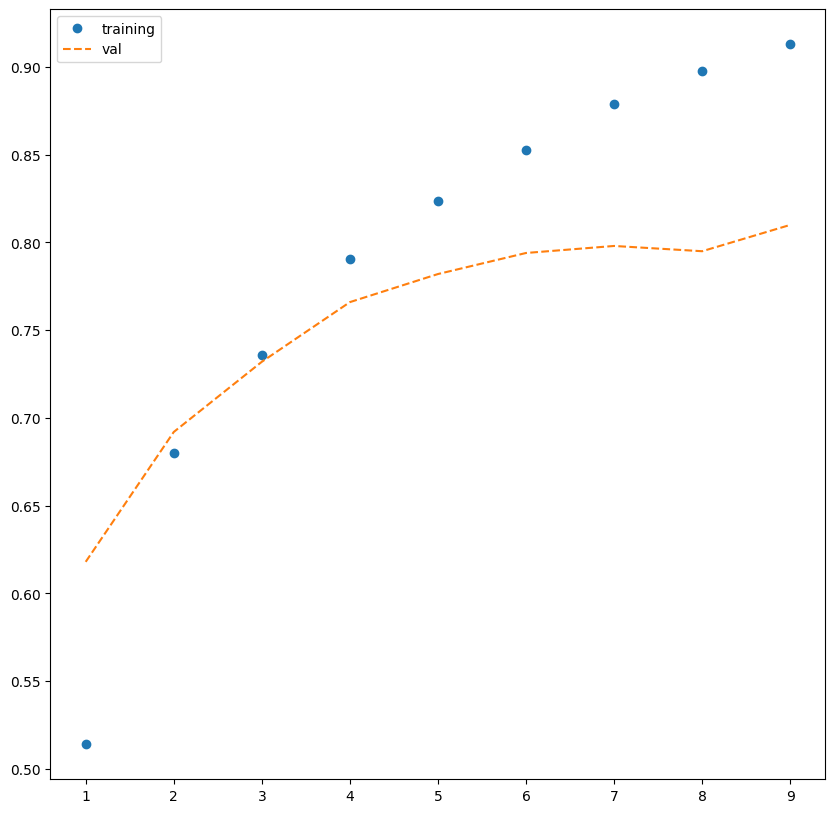

In [ ]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

# Observamos valores de accuracy contra las epocas
fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,acc_values, 'o',label='training')
plt.plot(epoch,val_acc_values, '--',label='val')
plt.legend()
plt.show()

## Predicciones

In [ ]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 0.9523 - acc: 0.7876


[0.9522569179534912, 0.7876224517822266]

In [ ]:
# Genera una prediccion probabilistca
prediction = model.predict(x_test)
prediction

71/71 [==============================] - 0s 3ms/step


array([[7.7116791e-05, 9.8863762e-05, 3.2609566e-06, ..., 4.2682797e-05,
        6.5365925e-06, 1.2175877e-05],
       [8.2735503e-03, 6.8545967e-02, 1.1615432e-02, ..., 1.7902452e-03,
        1.8296119e-05, 9.1071601e-04],
       [2.1245042e-03, 8.9001435e-01, 5.8095250e-03, ..., 6.2319444e-04,
        2.1594483e-04, 1.9053485e-04],
       ...,
       [1.7985540e-04, 2.5757376e-04, 8.7879518e-05, ..., 2.5045100e-04,
        8.3090134e-05, 3.0981773e-04],
       [2.6575604e-03, 2.0531870e-02, 1.4680061e-03, ..., 1.3118198e-03,
        4.0787846e-04, 1.9298895e-03],
       [8.0699759e-04, 6.7042714e-01, 1.9825492e-02, ..., 1.0028790e-03,
        1.1449880e-04, 4.1068075e-04]], dtype=float32)

In [ ]:
# Si sumas las probabilidades de 1 sola palabra, obtendras 1
np.sum(prediction[0])

1.0000001

In [ ]:
# Ubicamos la mayor probabilidad con argmax
np.argmax(prediction[0])

3

# Modelo de Regresion Lineal

In [ ]:
# Datos con las el valor de las casas de acuerdo con 13 categorias distintas
(train_data , train_targets) ,(test_data,test_targets) = boston_housing.load_data()

In [ ]:
# Cada dato es bastante grande, por lo que se debe de estandarizar cada columna
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

## Estandarizacion de datos

Estandarizamos los datos a partir de la formula:

$Z = \frac{x - μ}{σ}$

en donde x es cualquier dato de cada columna, $\mu$ es el promedio de cada columna y $σ$ es la desviacion estandar para c/columna.

In [ ]:
# Obtenemos mean y std y estandarizamos todas las columnas
mean = np.mean(train_data, axis=0)
std = np.std(train_data, axis=0)
train_data_z = (train_data - mean)/std

# Estandarizamos los datos de test con el mismo mean y std, ya que, en teoria, no tendriamos los datos de las casas a predecir.
test_data_z = (test_data - mean)/std

## Creacion del modelo

Sigue siendo el mismo proceso, pero en este caso, la ultima capa solo va a utilizar 1 neurona ya que no va a hacer un proceso de clasificacion, sino que nos calculara un numero continuo. 

Dado que solo es 1 numero, se puede decir que es una operacion lineal y por tanto no requiere demas neuronas.

Por otro lado, el `compile` va a cambiar, ya que el optimizador dependera directamente del learning rate o $α$ que se utilice. Ademas, la funcion de perdida se mide a traves del `mean squared error` o `mse`, y la metrica de exito se medira a traves del `mean absolute error` o `mae`.

In [ ]:
def build_model_regression(input_data):
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(input_data,)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
    return model

## K Fold Cross-Validation

En el aprendizaje automático, la validación cruzada k-fold es una técnica utilizada para evaluar el rendimiento y la capacidad de generalización de un modelo. Implica dividir un conjunto de datos en k subconjuntos, o "folds", de tamaño aproximadamente igual.


El proceso de validación cruzada k-fold generalmente sigue estos pasos:


El conjunto de datos se mezcla aleatoriamente para garantizar que los puntos de datos no estén ordenados de ninguna manera específica que pueda introducir sesgo durante el proceso de evaluación.

El conjunto de datos se divide en k folds de igual tamaño. Cada fold actúa como un conjunto de prueba una vez, mientras que los k-1 folds restantes se combinan para formar el conjunto de entrenamiento.

El modelo se entrena k veces, cada vez utilizando un fold diferente como conjunto de prueba y los folds restantes como conjunto de entrenamiento.

Para cada iteración, el modelo se entrena con el conjunto de entrenamiento y se evalúa con el conjunto de prueba correspondiente. Se calculan y registran métricas de rendimiento, como precisión o error cuadrático medio.

Después de k iteraciones, las métricas de rendimiento de cada fold se promedian para obtener una única métrica de evaluación que representa el rendimiento del modelo en todos los folds.

La ventaja de utilizar la validación cruzada k-fold es que proporciona una estimación más robusta del rendimiento de un modelo en comparación con una sola división de entrenamiento y prueba. Al repetir el proceso de evaluación k veces y promediar los resultados, se ayuda a mitigar el impacto potencial de una división específica de entrenamiento y prueba que puede estar sesgada o no ser representativa del conjunto de datos en general.

Las opciones comunes para el valor de k son 5 y 10, pero la elección puede variar según el tamaño del conjunto de datos y los recursos computacionales disponibles.

Algo importante para resaltar es que `el numero de k clusters deben ser igual al numero de variables que se tienen`, con la finalidad de crear un buen modelo.

## EJEMPLO

En el caso de este ejemplo, primero generamos 4 clusters para hacer k validation.

En este caso, se divide toda la data en 4 muestras. 2 de ellas seran de validacion y 2 para entrenamiento. 

Entonces, lo que hace la k validation es entrenar el modelo con el cluster 1, predecir los valores del cluster 2 e iterar el modelo. Despues, usa la muestra 2 para entrenar y valida el modelo con la muestra 1 con la finalidad de iterar el modelo nuevamente (esto es sucesivo).



In [ ]:
# Defines epocas y en donde se guardaran
num_epoch = 80

# Guardas los datos del k fold cross validation
all_history = []

In [ ]:
# Establecemos el numero de clusters
k = 4

# Dividimos los datos entre los k clusters
num_val_samples = len(train_data_z) // k

In [ ]:
# Itera los distintos k clusters 
for i in range(k):

    # Imprime el cluster que utiliza para entrenar el modelo
    print("Fold " , i)

    # Hace un slicing de los datos que le corresponde al cluster de validation
    val_data = train_data_z[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    # Junta el resto de clusters restantes de data (los que no van a ser validados)
    partial_train_data = np.concatenate(
    [train_data_z[:i * num_val_samples], train_data_z[(i+1) * num_val_samples:]],
     axis= 0 )
    
    # Junta el resto de clusters restantes de targets (los que no van a ser validados) 
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]],
     axis= 0 )    
    
    # Crear el modelo de regresion 
    modelk = build_model_regression(13)

    # Entrenar modelo
    history = modelk.fit(partial_train_data, partial_train_targets, 
                         epochs=num_epoch, 
                         batch_size =16,
                         validation_data = (val_data, val_targets),
                         verbose=0)
    
    # Lista que guardar todos los datos del entrenamiento para los distintos clusters
    all_history.append(history.history['val_mae'])

Fold  0
Fold  1
Fold  2
Fold  3


In [ ]:
# Son los datos de 80 epocas de cada cluster
all_history

[[19.568992614746094,
  17.059614181518555,
  13.54686450958252,
  9.35296630859375,
  6.033816337585449,
  4.540894985198975,
  3.784334659576416,
  3.418391704559326,
  3.2227513790130615,
  3.148301839828491,
  3.031151294708252,
  2.897916316986084,
  2.8078317642211914,
  2.8009259700775146,
  2.713503122329712,
  2.6468207836151123,
  2.6069722175598145,
  2.526444911956787,
  2.5993196964263916,
  2.4101011753082275,
  2.4148566722869873,
  2.3328781127929688,
  2.3763248920440674,
  2.3258869647979736,
  2.2237017154693604,
  2.258086919784546,
  2.3536558151245117,
  2.2405054569244385,
  2.1562535762786865,
  2.2272701263427734,
  2.1089344024658203,
  2.19749116897583,
  2.1501121520996094,
  2.0718042850494385,
  2.190394401550293,
  2.1254525184631348,
  2.0310487747192383,
  2.1105990409851074,
  2.0920112133026123,
  2.1281261444091797,
  2.083944320678711,
  2.0922656059265137,
  1.9939823150634766,
  2.049468755722046,
  2.0324134826660156,
  2.0161452293395996,
  1.98

In [ ]:
# Se saca el promedio de MAE de cada epoca (80 promedios)
mae_list = pd.DataFrame(all_history).mean()
mae_list

0     19.528120
1     16.262569
2     12.207391
3      8.395033
4      6.070901
        ...    
75     2.297424
76     2.317243
77     2.316091
78     2.310332
79     2.281957
Length: 80, dtype: float64

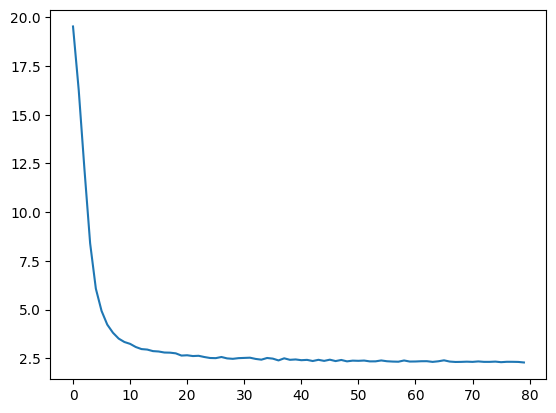

In [ ]:
# Graficamos el MAE de c/epoca vs las epocas
plt.plot([x for x in range(num_epoch)],mae_list)

In [ ]:
# Evalua modelo
history.evaluate(test_data_z,test_labels)

AttributeError: ignored